## Import Necessary Libraries
We start by importing necessary libraries into your notebook or python program.

In [ ]:
# Import necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import StandardScaler

Here, we bring in essential libraries: seaborn for dataset loading and visualization, pandas for data manipulation, numpy for numerical operations, load_penguins for loading the penguin dataset and the StandardScaler from scikit-learn is imported for standardizing the data.
## Loading Palmer Penguins Dataset
Next, we load the dataset to the notebook. The dataset comprises information about penguins, and we extract the feature columns.

In [ ]:
penguins = load_penguins()
penguins.head()
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins[features]

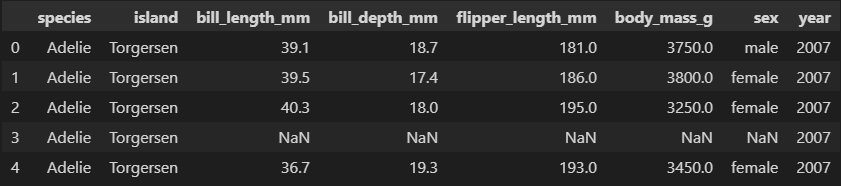</br>
## Identify Missing Values
Check for missing values (NaN) in your dataset. Use the isnull() method to identify which values are missing.

In [ ]:
missing_values = X.isnull().sum()
print(missing_values)

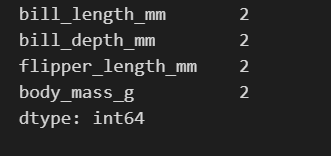</br>
## Handle Missing Values
Depending on the nature of your data, you might choose to drop rows or columns with missing values or impute them with appropriate values (mean, median, or others).

In [ ]:
# Drop rows with missing values
X_cleaned = X.dropna()

# or Impute missing values
X_imputed = X.fillna(X.mean())

## Check for Infinite Values
Use the np.isinf() function to check for infinite values in your dataset.

In [ ]:
infinite_values = np.isinf(X_cleaned)
print(infinite_values)

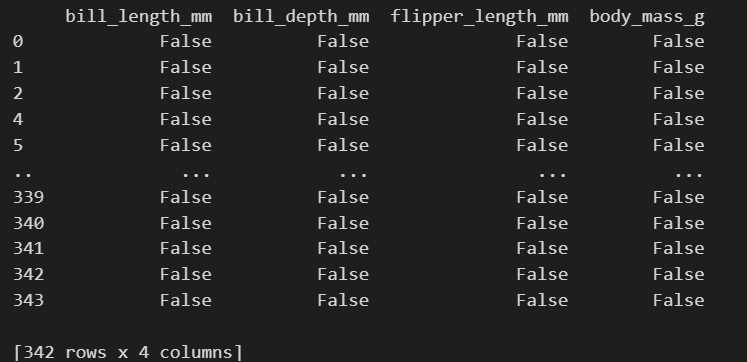</br>
## Standardize the cleaned dataset
After handling missing or infinite values, compute the standardization of your dataset before calculating the covariance matrix.

In [ ]:
# Standardize the cleaned or imputed dataset
X_cleaned_standardized = StandardScaler().fit_transform(X_cleaned)

## Calculate covariance matrix after handling missing data or infinite values.
After handling missing data or infinite values, the next crucial step in our analysis is the calculation of the covariance matrix. The covariance matrix holds significant importance in Principal Component Analysis (PCA) as it serves to quantify the degree to which two variables change in conjunction. In the context of PCA applied to our dataset with features like bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g, the covariance matrix becomes a pivotal tool. It provides a comprehensive overview of the relationships among these features, revealing patterns and dependencies that guide PCA in identifying the principal components responsible for capturing the maximum variance within the data.

In [ ]:
cov_matrix_cleaned = np.cov(X_cleaned_standardized.T, rowvar=False )

To obtain the covariance matrix from our cleaned and standardized dataset, denoted as X_cleaned_standardized, we employ the np.cov function with the argument rowvar=False. This setting allows us to treat each column as a variable, ensuring that the resulting cov_matrix_cleaned is a square matrix where each element encapsulates the covariance between two features. These covariances, both in terms of diagonal and off-diagonal elements, play a crucial role in unraveling the interplay between the various features.

To provide a visual representation of these relationships, we generate a heatmap of the covariance matrix using the seaborn library. The heatmap showcases the variance of individual features on the diagonal elements and the covariances between pairs of features on the off-diagonal elements. However, it's essential to address the feedback regarding the visibility of axis values on the heatmap. Ensuring clarity in the visualization is crucial for a comprehensive understanding.

In [ ]:
# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cov_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.show()

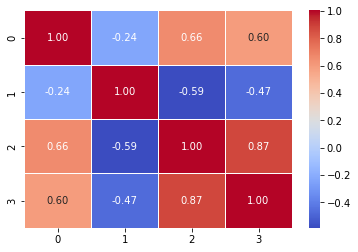</br>

Now, let's establish the link between covariance analysis and the determination of eigenvalues and eigenvectors, elucidating the utility of covariance analysis in the context of PCA. The covariance matrix essentially guides PCA by spotlighting how features co-vary, indicating which dimensions exhibit the most significant changes together. In the Principal Component Analysis process, the eigenvectors of the covariance matrix represent the directions in which the data varies the most. The eigenvalues, on the other hand, signify the magnitude of this variation along those directions.

By comprehending the covariance matrix, we gain insights into the underlying structure of the data, paving the way for PCA to identify the principal components. These principal components, derived from the eigenvectors, serve as a new basis for dimensionality reduction. The covariance matrix,is as an essential element in the determination of eigenvalues and eigenvectors, forming a connection between covariance analysis and the subsequent steps in our analytical journey.
## Finding Eigenvalues and Eigenvectors
Using NumPy's linear algebra module, we calculate the eigenvalues and eigenvectors of the covariance matrix. These represent the directions and magnitudes of the maximum variance in the data.


In [ ]:
# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_cleaned)

## Sorting Eigenvalues and Eigenvectors

In [ ]:
# Sort eigenvalues and eigenvectors in descending order
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Choosing Top k Eigenvectors
Here, we select the top k eigenvectors to form the new feature space. In this example, we choose k = 2 for a two-dimensional representation.

In [ ]:
# Choose the top k eigenvectors based on explained variance
k = 2
top_k_eigenvectors = np.array([eigen_pairs[i][1] for i in range(k)])

## Transforming the Data:
The original data is transformed into the new feature space defined by the selected eigenvectors. This reduces the dimensionality while retaining the most critical information.

In [ ]:
# Transform the data using the top k eigenvectors
X_transformed = np.dot(X_standardized, top_k_eigenvectors.T)

## Visual Comparison: Original Data vs. PCA Transformed Data
In this section, we conduct a visual comparison between the scatter plots of the original standardized data and the data transformed by Principal Component Analysis (PCA). This visual analysis aims to illustrate how PCA captures the maximum variance and potentially reveals clusters or patterns that may not be immediately apparent in the original data.
## Original Standardized Data
We begin by visualizing the original standardized data without performing dimensionality reduction using eigenvectors. Each point in the scatter plot represents an observation with respect to the features: 'bill_length_mm,' 'bill_depth_mm,' 'flipper_length_mm,' and 'body_mass_g.' The scatter plot provides insights into the distribution and relationships among these features in the high-dimensional space.

In [ ]:
# If dimensionality reduction is not performed using eigenvectors
X_no_reduction = X_cleaned_standardized

# Visualize the original standardized data without dimensionality reduction
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pd.DataFrame(X_no_reduction, columns=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']))
plt.title("Original Standardized Data Without Dimensionality Reduction")

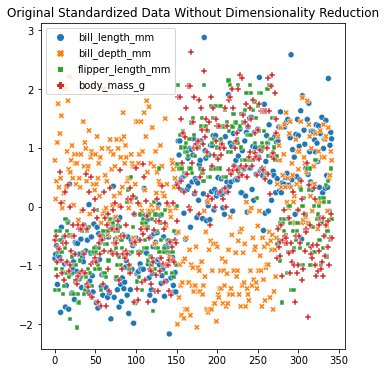</br>
## Data Transformed by PCA
Next, we explore the data transformed by PCA, specifically focusing on the first two principal components ('PC1' and 'PC2'). The scatter plot showcases the transformed data points, and the color differentiation is based on the 'species' column, providing insights into potential clusters or patterns revealed by PCA.

In [ ]:
# Visualize the data transformed by PCA
plt.subplot(1, 2, 2)
sns.scatterplot(data=pd.DataFrame(X_transformed, columns=['PC1', 'PC2']), x='PC1', y='PC2', hue=penguins['species'])
plt.title("Data Transformed by PCA")

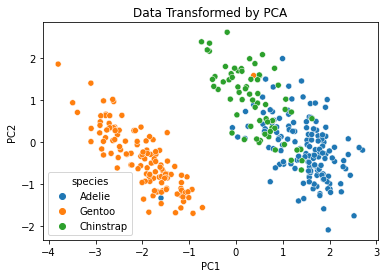</br>

## Printing Eigenvalues
Finally, we print the eigenvalues, providing insight into the magnitude of variance captured by each principal component.

In [ ]:
# Print the eigenvalues
print("Eigenvalues:")
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Eigenvalue {i+1}: {eigenvalue:.3f}")

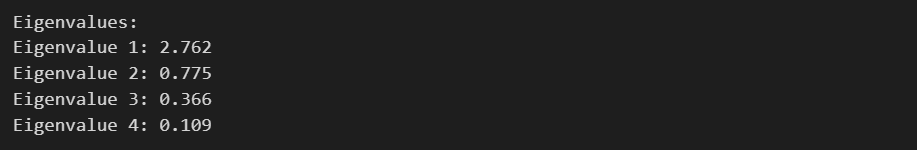</br>
## Benefits of Dimensionality Reduction:
- Simplified Representation: By representing the data in a lower-dimensional space, we retain most of the variance in the original data using fewer features.
- Visualization: The reduced dataset is visualized in a scatter plot, allowing us to observe patterns and relationships between penguins of different species more easily.
- Computational Efficiency: Working with a smaller set of features can improve the efficiency of certain machine learning algorithms and analyses.
- Noise Reduction: PCA tends to capture the most significant sources of variation in the data, potentially filtering out noise.
- Interpretability: The reduced dataset may offer more interpretable insights, as principal components often correspond to meaningful patterns in the original data.
